In [689]:
import pandas as pd
import matplotlib.pyplot as plts

In [690]:
df = pd.read_csv('./archive/stroke_prediction_dataset.csv')

assert(df.shape[0] > 0 and df.shape[1] > 0)

#### Showing the First Few Entries

* **Patient ID** is interesting but not useful in machine learning. It will be removed from the final dataset in cleaning
* **Patient Name** is private data that will be removed
* **Age** is a numerical field with no missing values. It will be worth plotting a histogram of the age. We can see it goes from 18 to 90 with a mean of 54
* **Gender** is a string field - we'll need to plot a pie chart to see how many categories there are and see how represented it is.
* **Hypertension** is a numeric field that seems to be boolean - worth verifying this is the case
* **Heart Disease** is a numeric field that seems to be boolean - worth verifying if this is the case
* **Marital Status** is a string field, it is worth checking out the different categories in a pie chart
* **Work Type** is a string field, also worth checking out the different categories in a pie chart
* **Residence Type** is a string field, worth checking out the different categories in a pie chart
* **Average Glucose Level** is a numerical variable which can have floating point types. Worth checking out some histograms of this. In real applications it may also be useful to have some time-series data of this field's values
* **Alcohol Intake** is a string field, worth checking out the different categories in a pie chart
* **Physical Activity** is a string field, worth checking out the different categories in a pie chart
* **Stroke History** appears to be a boolean field - worth verifying this is the case
* **Family History of Stroke** is a string field that appears to be boolean or small categorical. Worth investigating the representation here.
* **Dietary Habits** categorical string field, will need to be encoded and have the representations shown on a pie chart
* **Stress Levels** seems to be a numerical variable with floating point values. The lowest is '0' and the highest is '10', so it's possibly a value from self-reported data. The datacard and kaggle description doesn't seem to show where this data comes from
* **Blood Pressure Levels** string formatting in what one would assume to be <Systolic>/<Diastolic>. This data will need to be split into two separate columns. The systolic blood pressure is the amount of pressure in one's arteries when the heart beats. The diastolic blood pressure is the amount of pressure in one's arteries between heart beats (resting)
* **Cholesterol Levels** is a string showing HDL and LDL. This will need to be split into two variables for HDL and LDL respectively as numerical values.
* **Symptoms** is the only column where there are rows with missing values. It is a string list of various symptoms. Depending on the quantity of unique symptoms, this may need to be encoded into separate variables for each possible symptom.
* **Diagnosis** is the target variable. This will need to be encoded, graphed, and the distribution explored.

In [691]:
df.head(10)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,...,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
6,25525,Elakshi Karan,40,Female,1,0,Married,Private,Urban,77.83,...,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",NaN,No Stroke
7,4809,Shalv Dugar,61,Female,0,1,Divorced,Government Job,Rural,194.73,...,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
8,7372,Raghav Handa,72,Female,1,1,Married,Self-employed,Rural,72.99,...,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke
9,37504,Krish Kulkarni,82,Male,0,0,Divorced,Self-employed,Urban,111.23,...,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",NaN,No Stroke


In [692]:
df.shape

(15000, 22)

In [693]:
df.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [694]:
df.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [695]:
# corr = df["Age", "Average Glucose Level", "Body Mass Index (BMI)", "Stress Levels"].corr()

In [696]:
df.isna().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

### Cleaning

#### Removing Unnecessary Columns

The patient ID and name will be removed here, along with any other columns that are selected for removal before training for machine learning

In [697]:
columns_to_remove = ['Patient ID', 'Patient Name']

# Allows this cell to be ran multiple times without breaking
if columns_to_remove[0] in df.columns:
    df.drop(columns_to_remove, axis=1, inplace=True)

for column in columns_to_remove:
    assert(column not in df.columns)

df.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

#### Examining Potential Boolean Variables

There are a few variables, like **hypertension**, **heart disease**, **stroke history**, **family history of stroke history**, and **diagnosis** which are apparently boolean, but this needs to be more closely examined

Most people do not have hypertension. Undersampling or oversampling may be necessary here

In [698]:
df['Hypertension'].value_counts()

Hypertension
0    11265
1     3735
Name: count, dtype: int64

The pie chart below shows that it's about a 75% to 25% imbalance in hypertension distribution

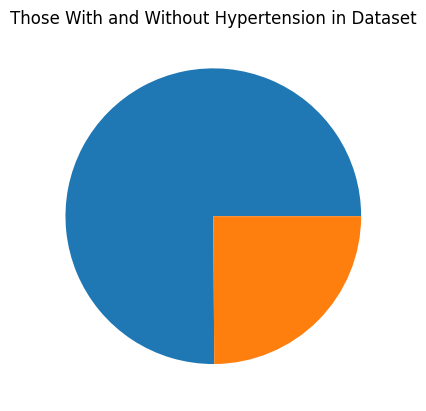

In [699]:
plt.pie(df['Hypertension'].value_counts())
plt.title("Those With and Without Hypertension in Dataset")
plt.show()

**Heart Disease** is really nicely distributed

In [700]:
df['Heart Disease'].value_counts()

Heart Disease
1    7544
0    7456
Name: count, dtype: int64

**Stroke History** is really evenly distributed

In [701]:
df['Stroke History'].value_counts()

Stroke History
1    7504
0    7496
Name: count, dtype: int64

**Familly History of Stroke** is really evenly distributed

In [702]:
df['Family History of Stroke'].value_counts()

Family History of Stroke
Yes    7592
No     7408
Name: count, dtype: int64

**Diagnosis** is really evenly distributed

In [703]:
df['Diagnosis'].value_counts()

Diagnosis
No Stroke    7532
Stroke       7468
Name: count, dtype: int64

**Gender** is a little skewed towards male bias, but it's a fairly small skew that shouldn't bring forth too much imbalance

In [704]:
df['Gender'].value_counts()

Gender
Male      7622
Female    7378
Name: count, dtype: int64

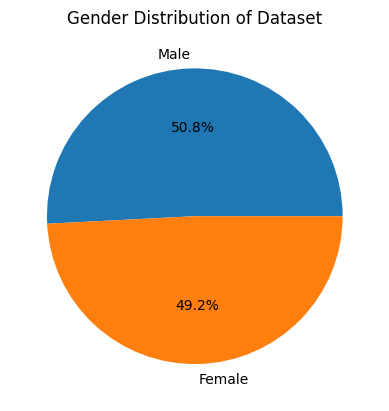

In [705]:
if "Gender" in df.columns:
    plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().keys(), autopct='%1.1f%%')
    plt.title('Gender Distribution of Dataset')
    plt.show()

#### Examining the Categorical Variables

The Pie Chart for **Marital Status** shows the possible values being Single, Married, and Divorced. Each of these categories is nicely distributed with only the slightest skew towards single vs. married.

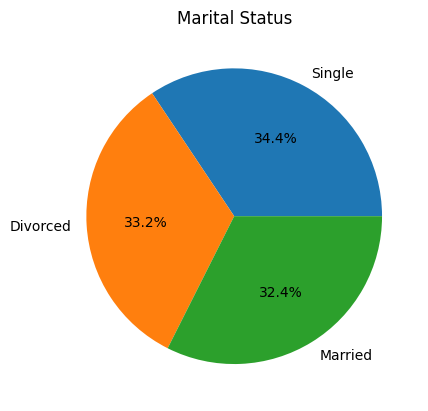

In [706]:
plt.pie(df['Marital Status'].value_counts(), labels = df['Marital Status'].value_counts().keys(), autopct='%1.1f%%')
plt.title("Marital Status")
plt.show()

Really nice distribution of **Work Type** between being:
* Self-employed
* Private
* Never Worked
* Government Job

All that needs to happen with this variable is encoding - no distribution problems here.

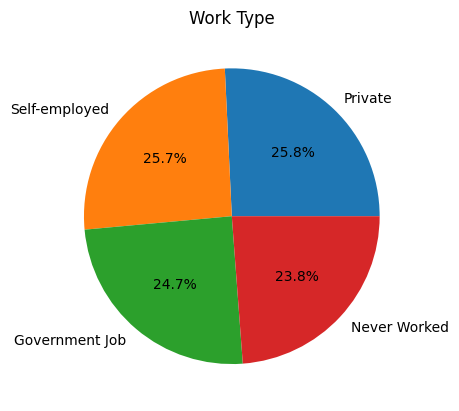

In [707]:
plt.pie(df['Work Type'].value_counts(), labels=df['Work Type'].value_counts().keys(), autopct='%1.1f%%')
plt.title("Work Type")
plt.show()

Really nice distribution of **Residence Type**, but this is really a boolean variable rather than multicategorical - it may be simply boolean encoded in the proceeding step

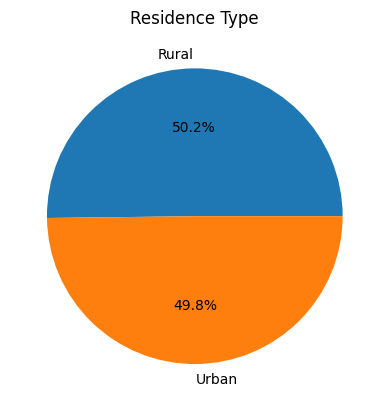

In [708]:
plt.pie(df['Residence Type'].value_counts(), labels=df['Residence Type'].value_counts().keys(), autopct='%1.1f%%')
plt.title("Residence Type")
plt.show()

Really nice distribution for **Smoking Status**. Data points are divided almost perfectly evenly between:
* Current Smokers
* Former Smokers
* Non Smokers

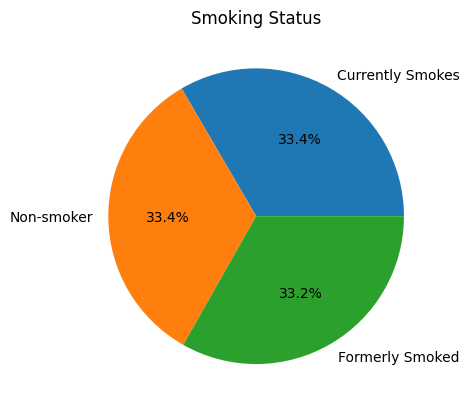

In [709]:
smoking = df['Smoking Status'].value_counts()
plt.pie(smoking, labels=smoking.keys(), autopct='%1.1f%%')
plt.title("Smoking Status")
plt.show()

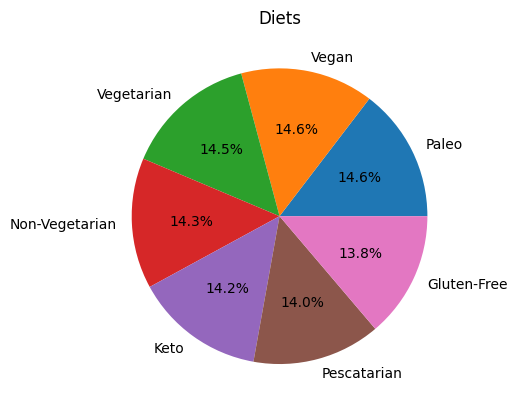

In [710]:
diet = df['Dietary Habits'].value_counts()
plt.pie(diet, labels=diet.keys(), autopct='%1.1f%%')
plt.title("Diets")
plt.show()

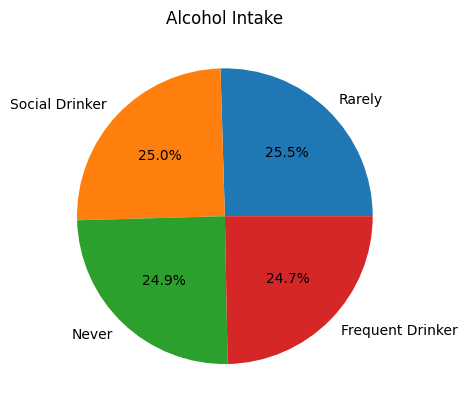

In [711]:
alcohol = df['Alcohol Intake'].value_counts()
plt.pie(alcohol, labels=alcohol.keys(), autopct='%1.1f%%')
plt.title("Alcohol Intake")
plt.show()

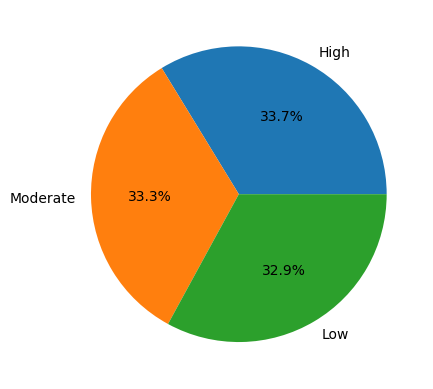

In [712]:
physical = df['Physical Activity'].value_counts()
plt.pie(physical, labels=physical.keys(), autopct='%1.1f%%')
plt.show()

#### Encoding the Boolean Variables

In [713]:
df['Diagnosis'] = df['Diagnosis'].replace({'No Stroke': 0, 'Stroke': 1})
df['Diagnosis'].value_counts()

Diagnosis
0    7532
1    7468
Name: count, dtype: int64

In [714]:
df['Family History of Stroke'] = df['Family History of Stroke'].replace({"Yes": 1, "No": 0})
df['Family History of Stroke'].value_counts()

Family History of Stroke
1    7592
0    7408
Name: count, dtype: int64

Here we additionally rename **Gender** to **Gender_Female** as the encoded variable becomes a boolean flag (and in the case of this dataset if they aren't a female it is inferred they are a male, rather than gender being a multicategorical variable)

In [715]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df = df.rename(columns={'Gender': 'Gender_Female'})
df['Gender_Female'].value_counts()

Gender_Female
0    7622
1    7378
Name: count, dtype: int64

In [716]:
if "Residence Type" in df.columns:
    df['Residence Type'] = df['Residence Type'].replace({'Rural': 0, 'Urban': 1})
    df = df.rename(columns={"Residence Type": "Residence_Urban"})
df['Residence_Urban'].value_counts()

Residence_Urban
0    7529
1    7471
Name: count, dtype: int64

#### Separating Blood Pressure

In [717]:
if 'Blood Pressure Levels' in df.columns:
    df[['diastolic', 'systolic']] = df['Blood Pressure Levels'].str.split('/', expand=True)
    df['diastolic'] = pd.to_numeric(df['diastolic'])
    df['systolic'] = pd.to_numeric(df['systolic'])
    df.drop('Blood Pressure Levels', axis=1, inplace=True)

assert("Blood Pressure Levels" not in df.columns)
df[['diastolic', 'systolic']].head()

,diastolic,systolic
0,140,108
1,146,91
2,154,97
3,174,81
4,121,95


#### Separating the Cholesterol Levels

In [718]:
if 'Cholesterol Levels' in df.columns:
    # Split the column into two separate variables
    df[['HDL', 'LDL']] = df['Cholesterol Levels'].str.split(',', expand=True)
    # Extract numerical portion of the string for each column
    df['HDL'] = df['HDL'].str.split(':', expand=True)[:][1]
    df['LDL'] = df['LDL'].str.split(':', expand=True)[:][1]
    # Convert the data types
    df['HDL'] = pd.to_numeric(df['HDL'])
    df['LDL'] = pd.to_numeric(df['LDL'])
    # Remove the initial column
    df.drop('Cholesterol Levels', axis=1, inplace=True)

assert('Cholesterol Levels' not in df.columns)
df[['HDL', 'LDL']].head(5)

,HDL,LDL
0,68,133
1,63,70
2,59,95
3,70,137
4,65,68


#### Encoding Symptoms

In [719]:
# if "Symptoms" in df.columns:
#     symptom_dummies = df['Symptoms'].str.get_dummies(', ')
#     df = pd.concat([df, symptom_dummies], axis=1)
#     df.drop('Symptoms', axis=1, inplace=True)

# assert("Symptoms" not in df.columns)
# df.head(5)

#### Encoding Remaining Categorical Variables

This goes through the explicitly-declared categorical variables and encodes them

In [720]:
categorical_variables = ["Marital Status", "Work Type", "Smoking Status", "Alcohol Intake", "Physical Activity", "Dietary Habits"]

for categorical_variable in categorical_variables:
    if categorical_variable in df.columns:
        dummies = df[categorical_variable].str.get_dummies()
        df = pd.concat([df, dummies], axis=1)
        df.drop(categorical_variable, axis=1, inplace=True)

for categorical_variable in categorical_variables:
    assert(categorical_variable not in df.columns)
    
df.columns

Index(['Age', 'Gender_Female', 'Hypertension', 'Heart Disease',
       'Residence_Urban', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stroke History', 'Family History of Stroke', 'Stress Levels',
       'Symptoms', 'Diagnosis', 'diastolic', 'systolic', 'HDL', 'LDL',
       'Divorced', 'Married', 'Single', 'Government Job', 'Never Worked',
       'Private', 'Self-employed', 'Currently Smokes', 'Formerly Smoked',
       'Non-smoker', 'Frequent Drinker', 'Never', 'Rarely', 'Social Drinker',
       'High', 'Low', 'Moderate', 'Gluten-Free', 'Keto', 'Non-Vegetarian',
       'Paleo', 'Pescatarian', 'Vegan', 'Vegetarian'],
      dtype='object')

#### Examining Numerical Variables

With a boxplot of age, we are able to see that it is nicely distributed with a mean of 54, a fairly wide distribution as well. Probably nothing will need to be done with age, aside from normalization prior to being fed into a model as training data.

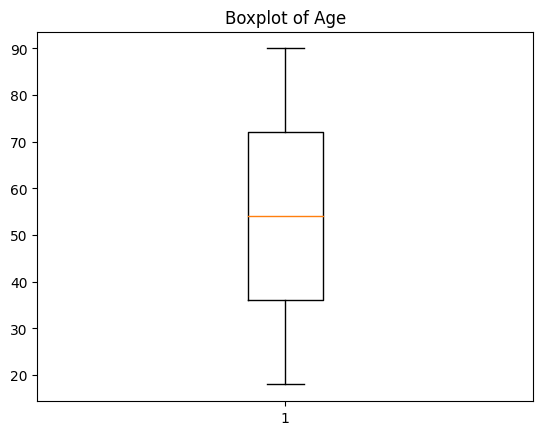

In [721]:
plt.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.show()

Showing the **Average Glucose Level** we are able to see a nice normal distribution with a mean of 130, most data points being between 95 and 160, and a min of 60 and max of 200

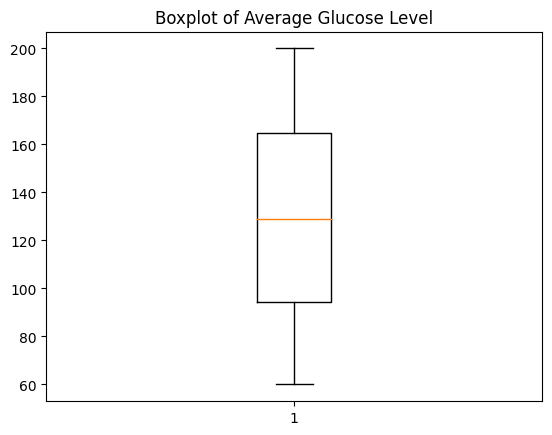

In [722]:
plt.boxplot(df['Average Glucose Level'])
plt.title("Boxplot of Average Glucose Level")
plt.show()

Somewhat surprisingly, the **BMI** is really nicely, normally distributed here

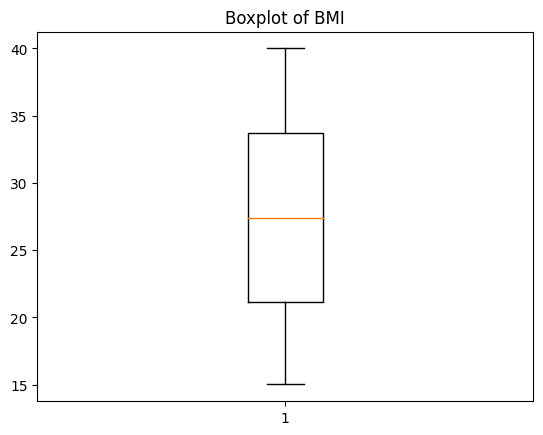

In [723]:
plt.boxplot(df['Body Mass Index (BMI)'])
plt.title("Boxplot of BMI")
plt.show()

The **Stress Level** boxplot shows a really nice normal distribution with the average person being 5 out of 10 stressed, with most people being between a 3 and 7.

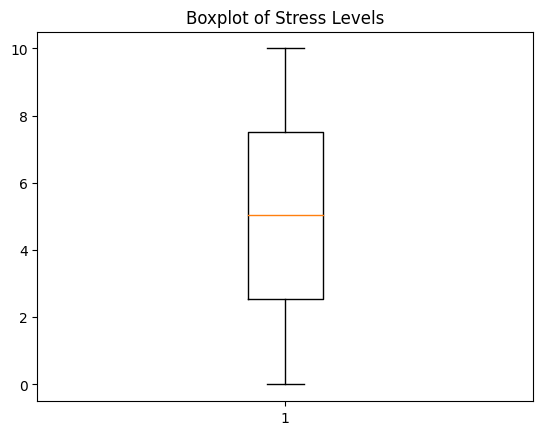

In [724]:
plt.boxplot(df['Stress Levels'])
plt.title("Boxplot of Stress Levels")
plt.show()

Really nice distribution of the **Diastolic Blood Pressure**

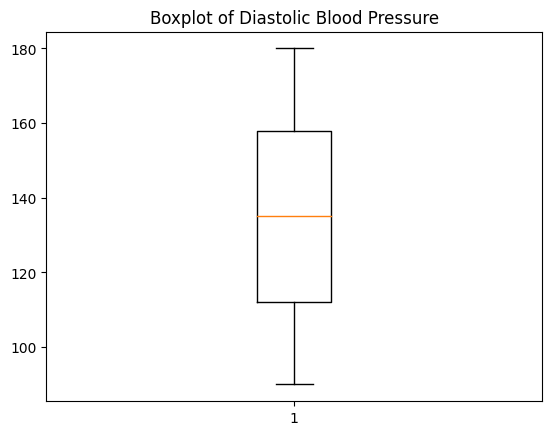

In [725]:
plt.boxplot(df['diastolic'])
plt.title("Boxplot of Diastolic Blood Pressure")
plt.show()

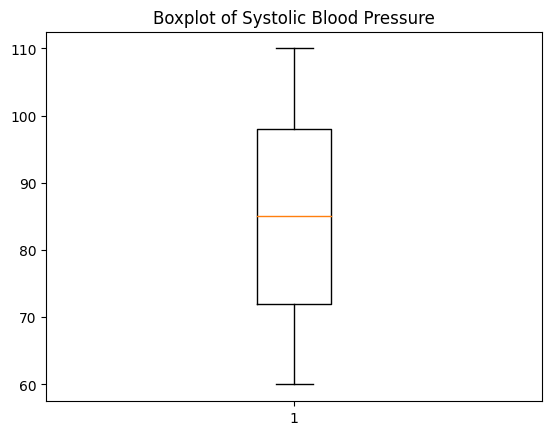

In [726]:
plt.boxplot(df['systolic'])
plt.title("Boxplot of Systolic Blood Pressure")
plt.show()

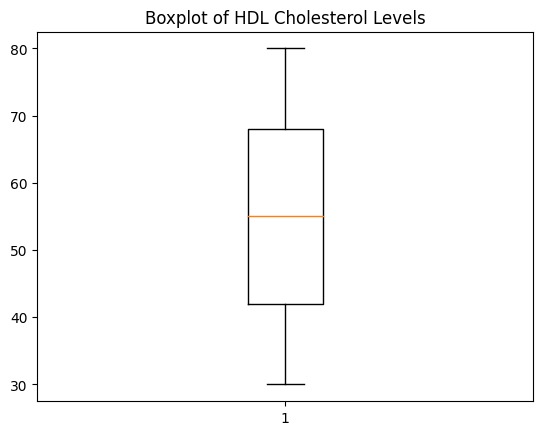

In [727]:
plt.boxplot(df['HDL'])
plt.title("Boxplot of HDL Cholesterol Levels")
plt.show()

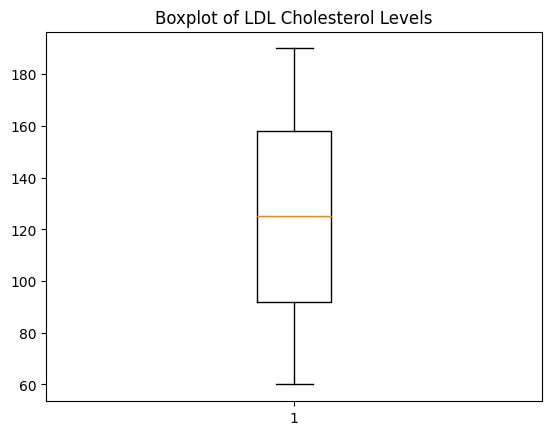

In [728]:
plt.boxplot(df['LDL'])
plt.title("Boxplot of LDL Cholesterol Levels")
plt.show()

In [729]:
df.describe()

,Age,Gender_Female,Hypertension,Heart Disease,Residence_Urban,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,High,Low,Moderate,Gluten-Free,Keto,Non-Vegetarian,Paleo,Pescatarian,Vegan,Vegetarian
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.035667,0.491867,0.249000,0.502933,0.498067,129.445209,27.474302,0.500267,0.506133,5.022694,...,0.337333,0.329467,0.333200,0.137867,0.142333,0.142933,0.146133,0.140400,0.145667,0.144667
std,21.063111,0.499951,0.432448,0.500008,0.500013,40.487792,7.230201,0.500017,0.499979,2.873223,...,0.472815,0.470035,0.471373,0.344771,0.349403,0.350017,0.353252,0.347413,0.352783,0.351776
min,18.000000,0.000000,0.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,94.517500,21.160000,0.000000,0.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,1.000000,0.000000,128.900000,27.420000,1.000000,1.000000,5.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,0.000000,1.000000,1.000000,164.592500,33.720000,1.000000,1.000000,7.520000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,200.000000,40.000000,1.000000,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [730]:
if 'Symptoms' in df.columns:
    df.drop("Symptoms", axis=1, inplace=True)

# Break if there are ANY null values at this point
for key in df.isna().sum().keys():
    assert(df.isna().sum()[key] == 0)

#### Scaling the Data

Since there are really no outliers in the data, we can use a **Standard Scaler** running Z-score normalization because the data is very close to perfect Gaussian distribution

In [731]:
df.columns

Index(['Age', 'Gender_Female', 'Hypertension', 'Heart Disease',
       'Residence_Urban', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stroke History', 'Family History of Stroke', 'Stress Levels',
       'Diagnosis', 'diastolic', 'systolic', 'HDL', 'LDL', 'Divorced',
       'Married', 'Single', 'Government Job', 'Never Worked', 'Private',
       'Self-employed', 'Currently Smokes', 'Formerly Smoked', 'Non-smoker',
       'Frequent Drinker', 'Never', 'Rarely', 'Social Drinker', 'High', 'Low',
       'Moderate', 'Gluten-Free', 'Keto', 'Non-Vegetarian', 'Paleo',
       'Pescatarian', 'Vegan', 'Vegetarian'],
      dtype='object')

In [732]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# df['Body Mass Index (BMI)']

numerical_columns = ["Age", "Average Glucose Level", "Body Mass Index (BMI)", "Stress Levels", "diastolic", "systolic", "HDL", "LDL"]

# scaler.fit(df[numerical_columns])
# scaled_data = scaler.transform(df[numerical_columns])

scaler.fit(df)
scaled_data = scaler.transform(df)

transformed_df = pd.DataFrame(scaled_data, columns=df.columns)
transformed_df.head(5)

,Age,Gender_Female,Hypertension,Heart Disease,Residence_Urban,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,High,Low,Moderate,Gluten-Free,Keto,Non-Vegetarian,Paleo,Pescatarian,Vegan,Vegetarian
0,0.093263,-0.983864,-0.575811,0.994150,-0.996141,0.036180,-0.705993,-1.000533,0.987808,-0.536939,...,-0.71348,-0.700964,1.414638,-0.399892,-0.407375,-0.408375,-0.413694,-0.404143,2.421774,-0.41126
1,1.232733,-0.983864,-0.575811,-1.005884,1.003874,1.340814,0.704803,-1.000533,-1.012343,-1.146031,...,-0.71348,1.426607,-0.706895,-0.399892,-0.407375,-0.408375,2.417243,-0.404143,-0.412920,-0.41126
2,-1.331076,-0.983864,1.736682,0.994150,-0.996141,1.470981,-0.989536,-1.000533,0.987808,0.796103,...,1.40158,-0.700964,-0.706895,-0.399892,-0.407375,-0.408375,2.417243,-0.404143,-0.412920,-0.41126
3,0.900388,-0.983864,-0.575811,-1.005884,1.003874,1.379345,0.003554,-1.000533,-1.012343,0.113920,...,-0.71348,-0.700964,1.414638,-0.399892,-0.407375,-0.408375,2.417243,-0.404143,-0.412920,-0.41126
4,-0.144127,-0.983864,1.736682,0.994150,1.003874,1.182983,0.219323,-1.000533,0.987808,0.632518,...,-0.71348,1.426607,-0.706895,-0.399892,-0.407375,-0.408375,-0.413694,2.474370,-0.412920,-0.41126


In [733]:
import seaborn as sns

In [739]:
df.head()

,Age,Gender_Female,Hypertension,Heart Disease,Residence_Urban,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,High,Low,Moderate,Gluten-Free,Keto,Non-Vegetarian,Paleo,Pescatarian,Vegan,Vegetarian
0,56,0,0,1,0,130.91,22.37,0,1,3.48,...,0,0,1,0,0,0,0,0,1,0
1,80,0,0,0,1,183.73,32.57,0,0,1.73,...,0,1,0,0,0,0,1,0,0,0
2,26,0,1,1,0,189.00,20.32,0,1,7.31,...,1,0,0,0,0,0,1,0,0,0
3,73,0,0,0,1,185.29,27.50,0,0,5.35,...,0,0,1,0,0,0,1,0,0,0
4,51,0,1,1,1,177.34,29.06,0,1,6.84,...,0,1,0,0,0,0,0,1,0,0


In [740]:
df.corr()

,Age,Gender_Female,Hypertension,Heart Disease,Residence_Urban,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,...,High,Low,Moderate,Gluten-Free,Keto,Non-Vegetarian,Paleo,Pescatarian,Vegan,Vegetarian
Age,1.000000,-0.001001,0.013378,-0.003900,0.002118,-0.005768,-0.008494,0.005503,-0.013540,0.007797,...,0.000372,-0.000783,0.000408,0.015279,0.003486,-0.017150,-0.001220,-0.016064,0.009260,0.006430
Gender_Female,-0.001001,1.000000,-0.006513,-0.005239,0.001137,0.005521,0.003510,-0.003458,0.000733,0.012442,...,-0.004751,0.006013,-0.001231,0.008827,-0.012265,-0.002881,-0.006860,0.015787,-0.005190,0.002900
Hypertension,0.013378,-0.006513,1.000000,0.002326,0.001764,-0.006343,-0.000653,0.008480,0.014675,0.003119,...,0.014693,-0.011007,-0.003762,0.007185,-0.010861,-0.007425,-0.002098,-0.003281,0.006090,0.010374
Heart Disease,-0.003900,-0.005239,0.002326,1.000000,0.010556,0.014327,-0.000317,-0.013870,0.007395,-0.009702,...,0.011325,0.001278,-0.012633,-0.006214,0.014974,-0.008491,0.004367,-0.003139,-0.000722,-0.000897
Residence_Urban,0.002118,0.001137,0.001764,0.010556,1.000000,0.002624,0.011665,-0.001198,-0.009420,-0.003166,...,-0.001189,-0.004098,0.005279,-0.000387,0.012451,-0.011373,0.006129,0.000411,-0.004640,-0.002579
Average Glucose Level,-0.005768,0.005521,-0.006343,0.014327,0.002624,1.000000,-0.006088,-0.003498,0.005956,0.001031,...,0.000607,0.010997,-0.011574,-0.016239,-0.008444,-0.002828,0.011184,0.012631,-0.009939,0.013380
Body Mass Index (BMI),-0.008494,0.003510,-0.000653,-0.000317,0.011665,-0.006088,1.000000,-0.003853,-0.001165,0.006069,...,-0.010339,0.000255,0.010116,0.012141,-0.002126,-0.013103,0.009295,-0.016593,0.001001,0.009299
Stroke History,0.005503,-0.003458,0.008480,-0.013870,-0.001198,-0.003498,-0.003853,1.000000,-0.000273,0.001355,...,-0.000099,0.001045,-0.000943,0.003267,0.000737,0.011973,-0.005128,-0.002902,-0.012126,0.004329
Family History of Stroke,-0.013540,0.000733,0.014675,0.007395,-0.009420,0.005956,-0.001165,-0.000273,1.000000,0.000607,...,-0.003958,-0.000088,0.004058,-0.007226,0.004734,0.001848,-0.010360,0.010012,0.012511,-0.011489
Stress Levels,0.007797,0.012442,0.003119,-0.009702,-0.003166,0.001031,0.006069,0.001355,0.000607,1.000000,...,-0.001575,-0.004698,0.006265,-0.007052,-0.000797,-0.003368,-0.015365,0.016815,0.008398,0.001456


<Axes: >

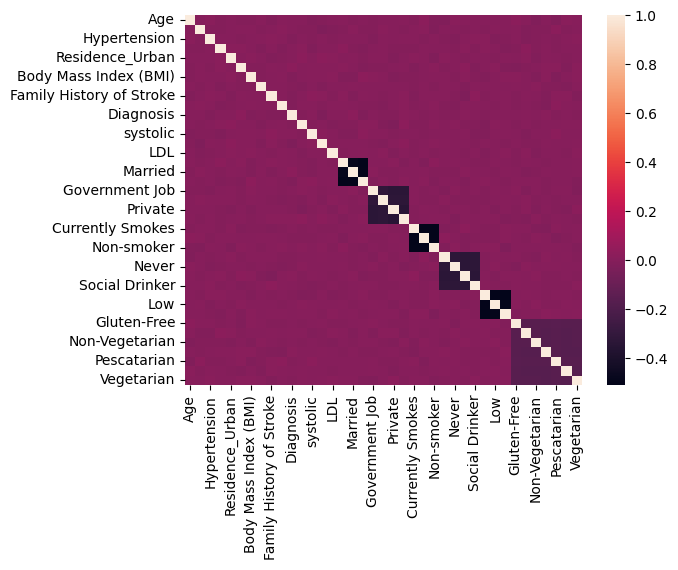

In [738]:
# sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".1f")
sns.heatmap(df.corr())

In [735]:
# df.head(10)
df.columns

Index(['Age', 'Gender_Female', 'Hypertension', 'Heart Disease',
       'Residence_Urban', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stroke History', 'Family History of Stroke', 'Stress Levels',
       'Diagnosis', 'diastolic', 'systolic', 'HDL', 'LDL', 'Divorced',
       'Married', 'Single', 'Government Job', 'Never Worked', 'Private',
       'Self-employed', 'Currently Smokes', 'Formerly Smoked', 'Non-smoker',
       'Frequent Drinker', 'Never', 'Rarely', 'Social Drinker', 'High', 'Low',
       'Moderate', 'Gluten-Free', 'Keto', 'Non-Vegetarian', 'Paleo',
       'Pescatarian', 'Vegan', 'Vegetarian'],
      dtype='object')

In [736]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [737]:
X = df[['Age', 'Gender_Female', 'Hypertension', 'Heart Disease',
       'Residence_Urban', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stroke History', 'Family History of Stroke', 'Stress Levels', 'diastolic', 'systolic', 'HDL', 'LDL', 'Blurred Vision',
       'Confusion', 'Difficulty Speaking', 'Dizziness', 'Headache',
       'Loss of Balance', 'Numbness', 'Seizures', 'Severe Fatigue', 'Weakness',
       'Divorced', 'Married', 'Single', 'Government Job', 'Never Worked',
       'Private', 'Self-employed', 'Currently Smokes', 'Formerly Smoked',
       'Non-smoker', 'Frequent Drinker', 'Never', 'Rarely', 'Social Drinker',
       'High', 'Low', 'Moderate', 'Gluten-Free', 'Keto', 'Non-Vegetarian',
       'Paleo', 'Pescatarian', 'Vegan', 'Vegetarian']]

y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KeyError: "['Blurred Vision', 'Confusion', 'Difficulty Speaking', 'Dizziness', 'Headache', 'Loss of Balance', 'Numbness', 'Seizures', 'Severe Fatigue', 'Weakness'] not in index"

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.5103333333333333
Confusion Matrix:
[[859 622]
 [847 672]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1481
           1       0.52      0.44      0.48      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

